#### MACHINE LEARNING HW 1 TEAM MEMBERS

1. REVANTH KURMETI                - 1002068038
2. AKHILA THOTA                   - 1002067862
3. SRI SAMRAJYA VYBHAV MALLAPPA   - 1002072400
4. JITHIN KRISHNA KONGARA         - 1002079491
5. MEGHANA KATRAJU                - 1002088571

basic python imports and settings for the notebook to run '''
import numpy as np

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
print('Reading the USPS dataset')


Reading the USPS dataset


In [2]:

_dir = os.listdir("C:/Users/revan/Downloads/USPS")

print(_dir)

['usps.h5']



h5py is a common package to interact with a dataset that is stored on an H5 file. it will be used to read the USPS dataset. it is the most prefferable way to read the dataset. it is also the most efficient way to read the dataset.

In [3]:
import h5py
from functools import reduce

# '''functools is a Python module that implements higher-order functions — functions that act on or return other functions.'''


Load the Data Function

In [4]:

def load_the_usps_dataset(path, tr_key = "target", flatten =True, _data = 'data'):
    '''This function loads the USPS dataset from the path and returns the train and test sets'''
    with h5py.File(path, 'r') as hf:
        ''' With h5py.File(path, 'r') as hf: is a context manager that opens the file in read-only mode and closes it when the block is exited.'''
        train = hf.get('train')
        X_tr = train.get(_data)[:]
        y_tr = train.get(tr_key)[:]
        test = hf.get('test')
        X_te = test.get(_data)[:]
        y_te = test.get(tr_key)[:]
        if flatten:
            '''Flatten means to make a 2D array into a 1D array.'''
            X_tr = np.reshape(X_tr, (X_tr.shape[0], -1))
            X_te = np.reshape(X_te, (X_te.shape[0], -1))
        return (X_tr, y_tr), (X_te, y_te)

calling the function 

In [5]:
path = 'C:/Users/revan/Downloads/USPS/usps.h5'
'''Calling function load_the_usps_dataset() & passing path as argument.'''
(X_tr, y_tr), (X_te, y_te) = load_the_usps_dataset(path)

print(X_tr.shape )
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)

(7291, 256)
(7291,)
(2007, 256)
(2007,)


plot the usps dataset

In [6]:
'''plotting the usps Dataset'''

import matplotlib.pyplot as plt
import numpy as np

def plot_usps(X, y, no_of_n_samples = 10):
    """
    It plots the first no_of_n_samples images from the dataset X, with the corresponding labels y.
    
    :param X: the data matrix
    :param y: the labels for the data
    :param no_of_n_samples: number of samples to plot, defaults to 10 (optional)
    """
    plt.figure(figsize=(20, 2))
    for index, (image, label) in enumerate(zip(X[0:no_of_n_samples], y[0:no_of_n_samples])):
        '''in this for loop, we are plotting the first 10 images from the dataset X, with the corresponding labels y. '''''
        plt.subplot(1, no_of_n_samples, index + 1)
        plt.imshow(np.reshape(image, (16, 16)), cmap=plt.cm.gray)
        plt.title('Training: %i /n' % label, fontsize = 20)



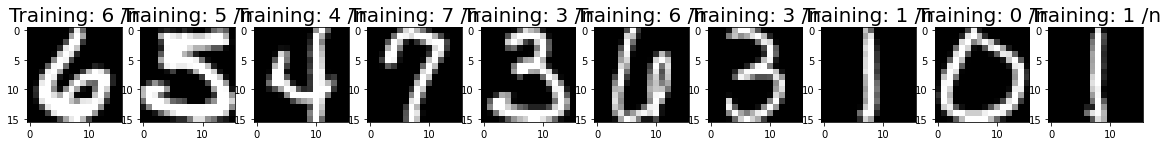

In [7]:
'''call the plot_usps function'''

plot_usps(X_tr, y_tr)



Training and testing the Dataset

In [8]:
'''Splitting the dataset into training and testing sets'''

from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X_tr, y_tr, test_size=0.2, random_state=0)

print(X_tr.shape)
print(y_tr.shape)

print(X_te.shape)
print(y_te.shape)



(5832, 256)
(5832,)
(1459, 256)
(1459,)


In [9]:
'''Train the model kneighborsclassifier'''

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr, y_tr)

'''Predict the model'''

y_pred = knn.predict(X_te)

'''Check the accuracy of the model'''

from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_te, y_pred))







Accuracy: 0.9595613433858807


plot the usps dataset

In [10]:

'''plot the knn model '''

import numpy as np
import matplotlib.pyplot as plt


def plot_usps(X, y, no_of_n_samples = 10):
    """
    It plots the first no_of_n_samples images from the dataset X, with the corresponding labels y.
    
    :param X:  data matrix
    :param y:  labels for the data
    :param no_of_n_samples: number of samples to plot, defaults to 10 (optional)
    """
    plt.figure(figsize=(20, 2))
    for index, (image, label) in enumerate(zip(X[0:no_of_n_samples], y[0:no_of_n_samples])):
        plt.subplot(1, no_of_n_samples, index + 1)
        plt.imshow(np.reshape(image, (16, 16)), cmap=plt.cm.gray)
        plt.title('Training: %i /n' % label, fontsize = 20)

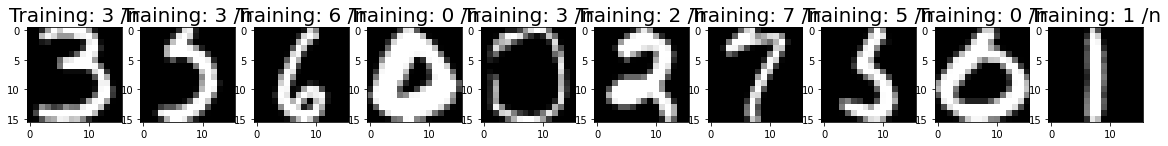

In [11]:
'''Calling the plot_usps function'''

plot_usps(X_te, y_pred)


# cross validation for knn model

In [12]:
'''Cross validation for KNN Model'''

from sklearn.model_selection import cross_val_score

_scores = cross_val_score(knn, X_tr, y_tr, cv=5, scoring='accuracy')
print(_scores)
print(f"The mean of the scores is {_scores.mean()}")


[0.96058269 0.97172237 0.96226415 0.98027444 0.95025729]
The mean of the scores is 0.9650201878120587


# precision and recall for knn model

In [13]:
'''Computing precision and recall for knn model'''

from sklearn.metrics import precision_score, recall_score

print(f"Precision score is {precision_score(y_te, y_pred, average='micro')}")
print(f"Recall score is {recall_score(y_te, y_pred, average='micro')}")



Precision score is 0.9595613433858807
Recall score is 0.9595613433858807


# confusion matrix for knn model

Normalized confusion matrix
[[0.99585062 0.         0.         0.00414938 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.01574803 0.         0.96850394 0.         0.         0.
  0.         0.00787402 0.00787402 0.        ]
 [0.00819672 0.         0.         0.97540984 0.         0.00819672
  0.         0.00819672 0.         0.        ]
 [0.         0.04347826 0.00724638 0.         0.9057971  0.
  0.01449275 0.00724638 0.         0.02173913]
 [0.03539823 0.         0.00884956 0.02654867 0.         0.90265487
  0.01769912 0.         0.         0.00884956]
 [0.02255639 0.         0.         0.         0.         0.01503759
  0.96240602 0.         0.         0.        ]
 [0.         0.008      0.         0.         0.         0.
  0.         0.976      0.         0.016     ]
 [0.02608696 0.0173913  0.00869565 0.02608696 0.0173913  0.00869565
  0.00869565 0.0173913  

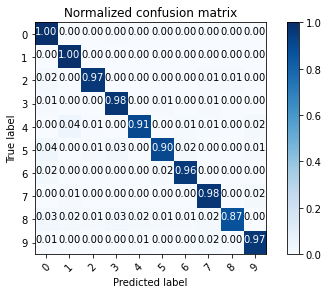

In [14]:
'''confusion matrix for knn model'''

import itertools
from sklearn.metrics import confusion_matrix

confusion_matrix(y_te, y_pred)

'''plotting the confusion matrix for knn model'''

import seaborn as sns

def plot_confusion_matrix(cm, classes,
                            normalize=True,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion Matrix, without Normalization')
    
        print(cm)
    
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        '''imshow is used to plot the confusion matrix'''
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
    
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            '''in this for loop, we are plotting the first 10 images from the dataset X, with the corresponding labels y. '''''
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
'''calling the plot_confusion_matrix function for knn model'''
plot_confusion_matrix(confusion_matrix(y_te, y_pred), classes=range(10), normalize=True, title='Normalized confusion matrix')


F1 score for knn model and plotting the score for the knn model

f1 score is 0.9595613433858807


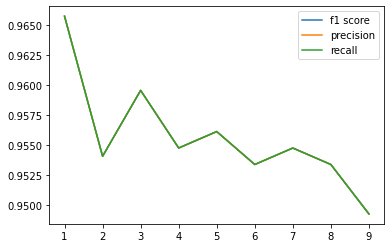

In [15]:
'''f1 score for knn model'''

from sklearn.metrics import f1_score

print(f"f1 score is {f1_score(y_te, y_pred, average='micro')}")
'''Plotting the f1 score for knn model'''

from sklearn.metrics import f1_score, precision_score, recall_score

f1_scores = []
precisions = []
recalls = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    y_pred = knn.predict(X_te)
    f1_scores.append(f1_score(y_te, y_pred, average='micro'))
    precisions.append(precision_score(y_te, y_pred, average='micro'))
    recalls.append(recall_score(y_te, y_pred, average='micro'))

plt.plot(range(1, 10), f1_scores, label='f1 score')
plt.plot(range(1, 10), precisions, label='precision')
plt.plot(range(1, 10), recalls, label='recall')
plt.legend()
plt.show()



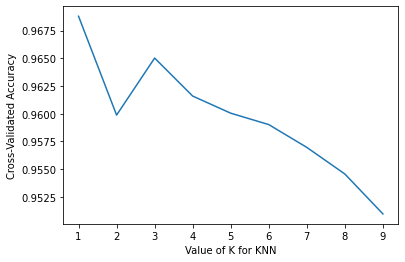

In [16]:
'''the best k for knn model'''

from sklearn.model_selection import cross_val_score

k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    _scores = cross_val_score(knn, X_tr, y_tr, cv=5, scoring='accuracy')
    k_scores.append(_scores.mean())
#plotting
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



Accuracy score is 0.9458533241946538
Precision score is 0.9458533241946538
Recall score is 0.9458533241946538
f1 score is 0.9458533241946538
Normalized confusion matrix
[[0.99585062 0.         0.         0.         0.         0.
  0.         0.         0.00414938 0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.01574803 0.         0.97637795 0.00787402 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.00819672 0.97540984 0.         0.00819672
  0.         0.         0.00819672 0.        ]
 [0.00724638 0.02173913 0.         0.         0.84782609 0.
  0.01449275 0.01449275 0.         0.0942029 ]
 [0.03539823 0.         0.         0.0619469  0.         0.86725664
  0.02654867 0.         0.00884956 0.        ]
 [0.0075188  0.         0.         0.         0.         0.
  0.9924812  0.         0.         0.        ]
 [0.         0.         0.         0.         0.016      0.
  0.  

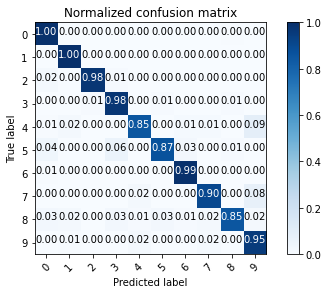

In [17]:
'''HOG for knn model'''

from skimage.feature import hog
from sklearn.metrics import accuracy_score

X_tr_hog = []
X_te_hog = []

for image in X_tr:
    fd = hog(image.reshape((16, 16)), orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))
    X_tr_hog.append(fd)

for image in X_te:
    fd = hog(image.reshape((16, 16)), orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))
    X_te_hog.append(fd)

X_tr_hog = np.array(X_tr_hog)
X_te_hog = np.array(X_te_hog)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr_hog, y_tr)
y_pred = knn.predict(X_te_hog)

#printing all the scores

print(f"Accuracy score is {accuracy_score(y_te, y_pred)}")
print(f"Precision score is {precision_score(y_te, y_pred, average='micro')}")
print(f"Recall score is {recall_score(y_te, y_pred, average='micro')}")
print(f"f1 score is {f1_score(y_te, y_pred, average='micro')}")
plot_confusion_matrix(confusion_matrix(y_te, y_pred), classes=range(10), normalize=True, title='Normalized confusion matrix')




    


# Change different K for KNN

using different k values for knn model get cross validation score, confusion matrix, f1 score, precision score, recall score. We the value of k ranges from 1-10

cross validation score for k = 1 is 0.9687934787561309
precision score for k = 1 is 0.9657299520219328
recall score for k = 1 is 0.9657299520219328
f1 score for k = 1 is 0.9657299520219328
Normalized confusion matrix
[[0.99585062 0.         0.         0.00414938 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.96850394 0.         0.         0.00787402
  0.         0.01574803 0.00787402 0.        ]
 [0.00819672 0.         0.         0.98360656 0.         0.
  0.         0.00819672 0.         0.        ]
 [0.00724638 0.03623188 0.         0.         0.92753623 0.
  0.00724638 0.         0.         0.02173913]
 [0.02654867 0.         0.00884956 0.04424779 0.00884956 0.88495575
  0.01769912 0.         0.         0.00884956]
 [0.01503759 0.         0.         0.         0.         0.
  0.97744361 0.         0.0075188  0.        ]
 [0.         0.008

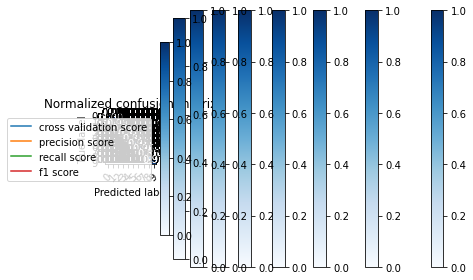

In [18]:
'''using different k values for knn model get cross validation score, confusion matrix, f1 score, precision score, recall score'''

k_range = range(1, 10)
k_scores = []
k_precision = []
k_recall = []
k_f1 = []
k_confusion_matrix = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    _scores = cross_val_score(knn, X_tr, y_tr, cv=5, scoring='accuracy')
    k_scores.append(_scores.mean())
    knn.fit(X_tr, y_tr)
    y_pred = knn.predict(X_te)
    k_precision.append(precision_score(y_te, y_pred, average='micro'))
    k_recall.append(recall_score(y_te, y_pred, average='micro'))
    k_f1.append(f1_score(y_te, y_pred, average='micro'))
    k_confusion_matrix.append(confusion_matrix(y_te, y_pred))

    '''print the cross validation score, confusion matrix, f1 score, precision score, recall score for knn model'''
    print(f"cross validation score for k = {k} is {_scores.mean()}")
    print(f"precision score for k = {k} is {precision_score(y_te, y_pred, average='micro')}")
    print(f"recall score for k = {k} is {recall_score(y_te, y_pred, average='micro')}")
    print(f"f1 score for k = {k} is {f1_score(y_te, y_pred, average='micro')}")
    plot_confusion_matrix(confusion_matrix(y_te, y_pred), classes=range(10), normalize=True, title='Normalized confusion matrix')
    print("")
'''plot the cross validation score, confusion matrix, f1 score, precision score, recall score for knn model'''

plt.plot(k_range, k_scores, label='cross validation score')
plt.plot(k_range, k_precision, label='precision score')
plt.plot(k_range, k_recall, label='recall score')
plt.plot(k_range, k_f1, label='f1 score')
plt.legend()
plt.show()









